In [1]:
%matplotlib inline

# Compute Sepal score

This example shows how to compute the Sepal score for spatially variable
genes identification.

The Sepal score is a method that simulates a diffusion process to
quantify spatial structure in tissue. See `andersson2021` for reference.

::: seealso
-   See `sphx_glr_auto_examples_graph_compute_co_occurrence.py` and
    `sphx_glr_auto_examples_graph_compute_moran.py` for other scores to
    identify spatially variable genes.
-   See `sphx_glr_auto_examples_graph_compute_spatial_neighbors.py` for
    general usage of `squidpy.gr.spatial_neighbors`.
:::


In [2]:
import squidpy as sq

adata = sq.datasets.visium_hne_adata()
adata

AnnData object with n_obs × n_vars = 2688 × 18078
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_counts', 'leiden', 'cluster'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'cluster_colors', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'spatial', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

We can compute the Sepal score with `squidpy.gr.sepal`. there are 2
important aspects to consider when computing sepal:

-   The function only accepts grid-like spatial graphs. Make sure to
    specify the maximum number of neighbors in your data (6 for an
    hexagonal grid like Visium) with `max_neighs = 6`.
-   It is useful to filter out genes that are expressed in very few
    observations and might be wrongly identified as being spatially
    variable. If you are performing pre-processing with Scanpy, there is
    a convenient function that can be used BEFORE normalization
    `scanpy.pp.calculate_qc_metrics`. It computes several useful summary
    statistics on both observation and feature axis. We will be using
    the `n_cells` columns in [adata.var]{.title-ref} to filter out genes
    that are expressed in less than 100 observations.

Before computing the Sepal score, we first need to compute a spatial
graph with `squidpy.gr.spatial_neighbors`. We will also subset the
number of genes to evaluate for efficiency purposes.


In [5]:
sq.gr.spatial_neighbors(adata)
genes = adata.var_names[(adata.var.n_cells > 100) & adata.var.highly_variable][0:100]
sq.gr.sepal(adata, max_neighs=6, genes=genes, n_jobs=1)
adata.uns["sepal_score"].head(10)

/home/ifichtner/anaconda3/envs/squidpy/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|███████████████| 100/100 [00:20<00:00,  4.94/s]


,sepal_score
Lct,7.868
1500015O10Rik,7.085
Ecel1,5.274
Fzd5,4.694
Cfap65,4.095
C1ql2,3.144
Slc9a2,2.947
Gm17634,2.904
St18,2.568
Des,2.494


We can visualize some of those genes with `squidpy.pl.spatial_scatter`.


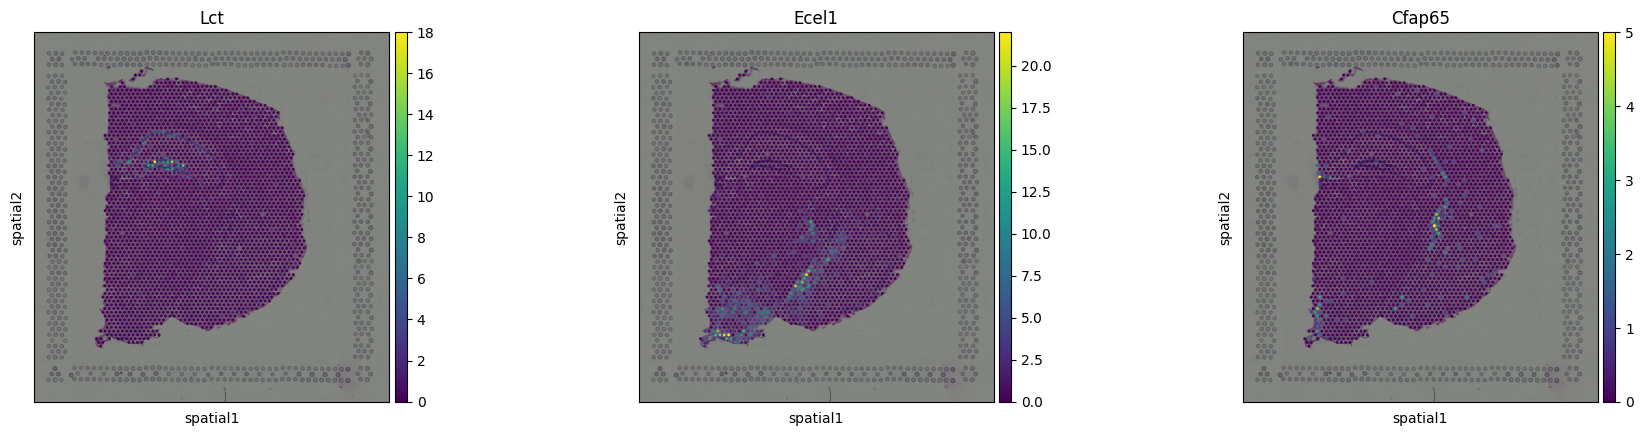

In [6]:
sq.pl.spatial_scatter(adata, color=["Lct", "Ecel1", "Cfap65"])

> IDF: parameter exploration

In [8]:
sq.gr.sepal(adata, genes=genes, max_neighs=6, n_jobs=8, dt=100)
adata.uns['sepal_score'].head()

100%|█████████████| 100/100 [00:00<00:00, 1193.59/s]


,sepal_score
Gm973,1600.0
Fzd5,1600.0
Sned1,1600.0
Slc9a2,1600.0
Il1r1,1600.0


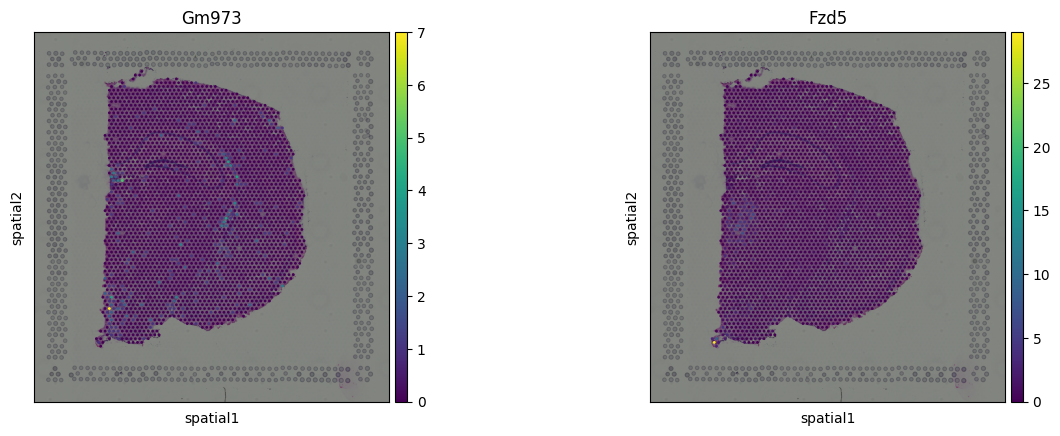

In [9]:
sq.pl.spatial_scatter(adata, color=['Gm973', 'Fzd5'])

In [18]:
sq.gr.sepal(adata, genes=genes, max_neighs=6, n_jobs=8, n_iter=10000)
adata.uns['sepal_score'].head()

100%|███████████████| 100/100 [00:03<00:00, 26.96/s]


,sepal_score
Lct,7.868
1500015O10Rik,7.085
Ecel1,5.274
Fzd5,4.694
Cfap65,4.095


> IDF: Time step in diffusion simulation (dt) yields variable results and I cannot find a pattern. Maximum number of iterations for the diffusion simulation (n_iter) seems to yield more confined results if increased. More accurate?